In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
import pandas as pd

# Define file paths
file1_path = '../Data/TorrTrials/arp/combinedResult.csv'
file2_path = '../Data/TorrTrials/Dhruv/combinedResult.csv'
file3_path = '../Data/TorrTrials/Prasanna/combinedResult.csv'
file4_path = '../Data/TorrTrials/rnk/combinedResult.csv'

# Read each CSV file into a DataFrame
data1 = pd.read_csv(file1_path)
data2 = pd.read_csv(file2_path)
data3 = pd.read_csv(file3_path)
data4 = pd.read_csv(file4_path)

# Combine all DataFrames
combined_data = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [5]:
# data = load_data()
data = combined_data
data.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,5.19443,-6.451870,-27.3241,3507.19,-6999.14,2351.19,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,4.58888,-8.338240,-39.2639,4662.49,-8587.69,2404.75,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,3.95106,-9.704820,-51.2587,5343.89,-9834.87,2809.59,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,6.34752,-6.923790,-64.8620,5218.11,-10957.00,2539.79,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,10.56410,-0.225128,-85.8131,5438.89,-12976.90,2298.55,-151.218,-63.3728,0,70


In [6]:
##### removing zero values so that data is not scattered highly

data = data[data['s'] != 0]

# Display the first few rows of the filtered dataset
data.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,5.19443,-6.451870,-27.3241,3507.19,-6999.14,2351.19,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,4.58888,-8.338240,-39.2639,4662.49,-8587.69,2404.75,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,3.95106,-9.704820,-51.2587,5343.89,-9834.87,2809.59,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,6.34752,-6.923790,-64.8620,5218.11,-10957.00,2539.79,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,10.56410,-0.225128,-85.8131,5438.89,-12976.90,2298.55,-151.218,-63.3728,0,70


In [7]:
data_labels = data["Fz"]
data.drop("Fz", axis=1)

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,0,5.19443,-6.451870,3507.19,-6999.14,2351.19,-256.2890,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,0,4.58888,-8.338240,4662.49,-8587.69,2404.75,-218.7690,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,0,3.95106,-9.704820,5343.89,-9834.87,2809.59,-191.9220,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,0,6.34752,-6.923790,5218.11,-10957.00,2539.79,-168.9350,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,0,10.56410,-0.225128,5438.89,-12976.90,2298.55,-151.2180,-63.3728,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,68262,826.73,769.61,753.24,757.89,776.87,-26.37,-904.79,511.23,-21.25,...,0,61.99030,94.222200,47072.10,-10015.90,6028.69,-20.5794,-96.7177,0,60
6490,68293,810.97,767.08,752.81,755.64,771.63,-35.64,-939.45,442.38,-67.66,...,0,59.64420,99.068100,44399.00,-9447.16,5669.16,-20.8284,-97.8877,0,60
6491,68324,781.51,762.04,752.79,754.97,762.83,401.37,-1300.29,631.35,-180.43,...,0,50.07000,88.532300,38823.40,-8443.56,4605.61,-22.2958,-102.5160,0,60
6492,68355,759.49,760.21,752.78,754.89,756.84,493.16,-1430.66,713.87,25.69,...,0,27.88060,53.736700,26741.10,-6761.62,2984.31,-29.5444,-116.8370,0,60


In [7]:
data.columns

Index(['currTime', 's1', 's2', 's3', 's4', 's', 'AccX', 'AccY', 'AccZ',
       'GyroX', 'GyroY', 'GyroZ', 'Frame', 'SubFrame', 'Fx', 'Fy', 'Fz', 'Mx',
       'My', 'Mz', 'Cx', 'Cy', 'Cz', 'Weight'],
      dtype='object')

Dimensionality Reduction

In [8]:
data = data.drop(["s", "currTime", "Frame","SubFrame","Fx","Fy","Fz","Mx","My","Mz","Cx","Cy","Cz"], axis=1)
data.head()

,s1,s2,s3,s4,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Weight
0,754.18,758.27,754.73,757.57,-215.82,-1025.88,333.01,0.34,-34.50,-54.49,70
1,755.85,758.69,754.79,758.29,-35.64,-990.72,399.90,33.84,-35.31,-52.63,70
2,758.30,759.12,754.98,758.66,109.86,-835.45,577.64,12.05,-6.95,-5.08,70
3,761.97,759.41,755.08,759.25,-91.80,-945.80,397.46,18.98,-16.66,-5.27,70
4,765.97,759.53,755.19,759.81,-111.33,-989.75,360.84,15.03,-3.83,-0.82,70


In [9]:

# 1. Load and Preprocess the Data
# Assuming 'data' is your full DataFrame with both features and labels
features = data[['s1', 's2', 's3', 's4', 'AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Weight']]
labels = data_labels  # Replace 'Label' with your label column name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [10]:

# Scale the features for better neural network performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
X_train.shape[1]

11

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 2. Define the Neural Network Model
# model = Sequential([
#     Dense(128, input_shape=(X_train.shape[1],), activation='relu'),  # More neurons in the first layer
#     Dense(64, activation='relu'),  # Additional layers
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(1, activation='linear')  # Output layer
# ])


model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),  # Increased neurons with L2 regularization
    BatchNormalization(),  # Batch Normalization
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='linear')  # Output layer for regression
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [40]:

# 3. Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 103666.9062 - mae: 315.0180 - val_loss: 95897.0312 - val_mae: 302.1727
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 59777.0547 - mae: 229.8409 - val_loss: 26260.1152 - val_mae: 135.1179
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 15026.6230 - mae: 98.1367 - val_loss: 4869.2031 - val_mae: 50.2587
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 6612.9614 - mae: 63.9992 - val_loss: 1255.1538 - val_mae: 25.9543
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 6415.4697 - mae: 62.7023 - val_loss: 863.9887 - val_mae: 21.4384
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 6123.0391 - mae: 62.4220 - val_loss: 761.7618 - val_mae: 19.4932
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 4922.9814 - mae: 54.7634 - val_loss: 741.8459 - val_mae: 19.3062
Epoch 

In [43]:

# 4. Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


41/41 [==============================] - 0s 900us/step - loss: 689.8969 - mae: 14.3065
Test Loss: 689.8969116210938, Test MAE: 14.30648136138916


In [44]:

# 5. Make Predictions
predictions = model.predict(X_test)


41/41 [==============================] - 0s 774us/step


In [45]:
from sklearn.metrics import r2_score

# Assuming y_test are true values and predictions are model outputs
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2 * 100:.2f}%")


R-squared: 84.79%


In [50]:
import numpy as np

# 1. Select 5 random indices from the test set
random_indices = np.random.choice(len(X_test), size=5, replace=False)

# 2. Get the corresponding data points and actual values
X_sample = X_test[random_indices]
y_actual = y_test.iloc[random_indices]

# 3. Make predictions on these data points
y_pred = model.predict(X_sample)

# 4. Print predictions and actual values for comparison
print("Predictions vs Actual Values:\n")
for i, (pred, actual) in enumerate(zip(y_pred, y_actual)):
    print(f"Data Point {i+1}: Predicted = {pred[0]:.2f}, Actual = {actual:.2f}")

# 5. Alternatively, print them in list format for a clear visual comparison
print("\nPredicted values:", y_pred.flatten())
print("Actual values:", y_actual.values)


1/1 [==============================] - 0s 21ms/step
Predictions vs Actual Values:

Data Point 1: Predicted = -374.88, Actual = -378.68
Data Point 2: Predicted = -290.98, Actual = -271.94
Data Point 3: Predicted = -244.52, Actual = -231.78
Data Point 4: Predicted = -304.23, Actual = -294.81
Data Point 5: Predicted = -241.04, Actual = -253.30

Predicted values: [-374.88376 -290.98495 -244.51895 -304.23093 -241.03993]
Actual values: [-378.675 -271.939 -231.784 -294.805 -253.303]


4/4 [==============================] - 0s 667us/step


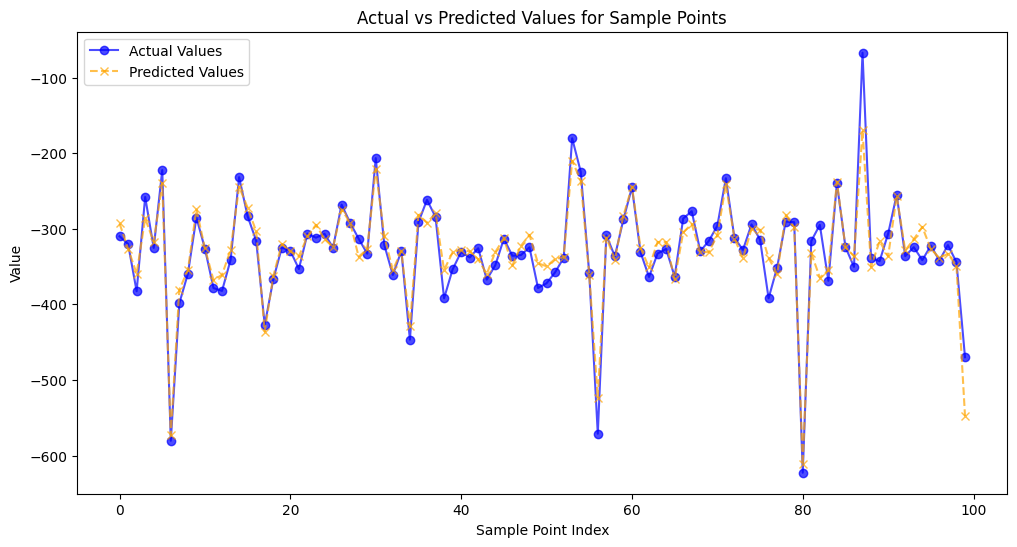

In [49]:
# Increase the number of sample points for a smoother curve
num_points = 100  # You can adjust this number or use len(X_test) for the entire test set
sample_indices = np.random.choice(len(X_test), size=num_points, replace=False)

y_sample_actual = y_test.iloc[sample_indices]
y_sample_pred = model.predict(X_test[sample_indices]).flatten()

# Plotting actual vs predicted values for these points
plt.figure(figsize=(12, 6))
plt.plot(y_sample_actual.values, marker='o', label="Actual Values", color='blue', linestyle='-', alpha=0.7)
plt.plot(y_sample_pred, marker='x', linestyle='--', label="Predicted Values", color='orange', alpha=0.7)
plt.xlabel("Sample Point Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values for Sample Points")
plt.legend()
plt.show()


4/4 [==============================] - 0s 1000us/step


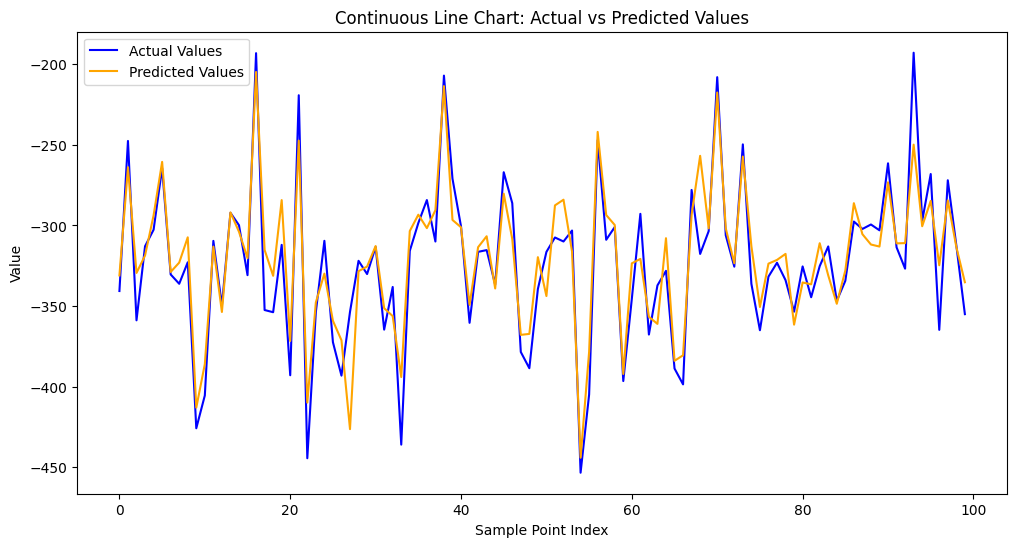

In [48]:
# Increase the number of sample points for a smoother line plot
num_points = 100  # You can adjust this number or use len(X_test) for the entire test set
sample_indices = np.random.choice(len(X_test), size=num_points, replace=False)

y_sample_actual = y_test.iloc[sample_indices]
y_sample_pred = model.predict(X_test[sample_indices]).flatten()

# Plotting actual vs predicted values as continuous lines
plt.figure(figsize=(12, 6))
plt.plot(y_sample_actual.values, label="Actual Values", color='blue', linestyle='-', linewidth=1.5)
plt.plot(y_sample_pred, label="Predicted Values", color='orange', linestyle='-', linewidth=1.5)
plt.xlabel("Sample Point Index")
plt.ylabel("Value")
plt.title("Continuous Line Chart: Actual vs Predicted Values")
plt.legend()
plt.show()


Complete experiment plot

In [16]:
exp1 = pd.read_csv(file1_path)
exp1.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,5.19443,-6.451870,-27.3241,3507.19,-6999.14,2351.19,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,4.58888,-8.338240,-39.2639,4662.49,-8587.69,2404.75,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,3.95106,-9.704820,-51.2587,5343.89,-9834.87,2809.59,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,6.34752,-6.923790,-64.8620,5218.11,-10957.00,2539.79,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,10.56410,-0.225128,-85.8131,5438.89,-12976.90,2298.55,-151.218,-63.3728,0,70


In [17]:
exp_labels = exp1["Fz"]
exp1.drop("Fz", axis=1)

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,0,5.19443,-6.451870,3507.19,-6999.14,2351.1900,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,0,4.58888,-8.338240,4662.49,-8587.69,2404.7500,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,0,3.95106,-9.704820,5343.89,-9834.87,2809.5900,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,0,6.34752,-6.923790,5218.11,-10957.00,2539.7900,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,0,10.56410,-0.225128,5438.89,-12976.90,2298.5500,-151.218,-63.3728,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,81918,840.80,762.36,756.19,758.54,779.47,121.58,-1069.82,384.77,-38.21,...,0,52.99470,68.747600,37123.10,-57871.10,-1726.9000,-116.823,-74.9454,0,70
2177,81949,821.84,760.95,756.04,757.93,774.19,26.86,-1106.93,428.71,-28.97,...,0,45.29580,57.009300,33276.20,-48054.40,-1254.7400,-120.369,-83.3572,0,70
2178,81980,792.41,759.75,755.92,757.56,766.41,113.77,-1388.18,372.07,-19.41,...,0,35.37750,48.488800,27449.90,-37725.10,-856.7920,-125.314,-91.1880,0,70
2179,82011,769.96,759.20,755.75,757.66,760.64,-374.51,-1027.34,374.51,-7.31,...,0,26.58030,33.265400,19653.00,-25808.30,-77.6082,-134.227,-102.2410,0,70


In [18]:
exp1 = exp1.drop(["s", "currTime", "Frame","SubFrame","Fx","Fy","Fz","Mx","My","Mz","Cx","Cy","Cz"], axis=1)
exp1.head()

,s1,s2,s3,s4,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Weight
0,754.18,758.27,754.73,757.57,-215.82,-1025.88,333.01,0.34,-34.50,-54.49,70
1,755.85,758.69,754.79,758.29,-35.64,-990.72,399.90,33.84,-35.31,-52.63,70
2,758.30,759.12,754.98,758.66,109.86,-835.45,577.64,12.05,-6.95,-5.08,70
3,761.97,759.41,755.08,759.25,-91.80,-945.80,397.46,18.98,-16.66,-5.27,70
4,765.97,759.53,755.19,759.81,-111.33,-989.75,360.84,15.03,-3.83,-0.82,70


In [19]:
exp1 = scaler.fit_transform(exp1)

69/69 [==============================] - 0s 839us/step


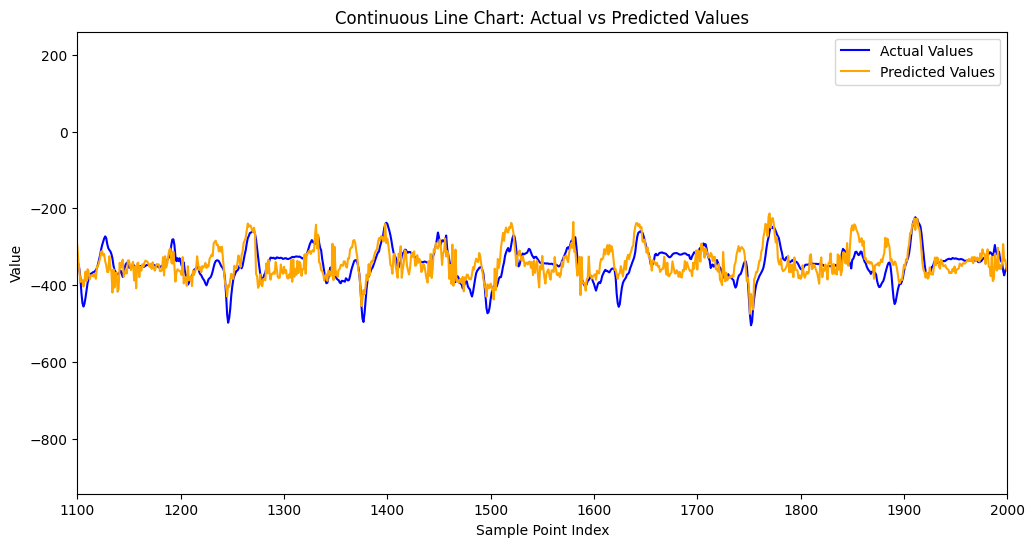

In [47]:
# Predicting for the entire test set
y_test_actual = exp_labels.values.flatten()  # Actual values from the test set
y_test_pred = model.predict(exp1).flatten()  # Predicted values for the entire test set

# Plotting actual vs predicted values as continuous lines
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Values", color='blue', linestyle='-', linewidth=1.5)
plt.plot(y_test_pred, label="Predicted Values", color='orange', linestyle='-', linewidth=1.5)
plt.xlabel("Sample Point Index")
plt.ylabel("Value")
plt.xlim(1100, 2000)
plt.title("Continuous Line Chart: Actual vs Predicted Values")
plt.legend()
plt.show()


In [63]:
from tensorflow.keras.utils import plot_model

# Visualize model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png')


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
